In [1]:
import copy
import os.path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from dbispipeline.analytics import get_results_as_dataframe
from mediaeval2021.analytics import extract_best_epoch
from mediaeval2021.analytics import extract_best_outcome
from mediaeval2021.analytics import extract_final_outcome
from mediaeval2021.analytics import extract_metrics
from mediaeval2021.analytics import plot_per_label
from mediaeval2021.analytics import print_per_label


results = get_results_as_dataframe(project_name='mediaeval2021', table_name='results')
results = results[results['date'] > '2021-10-13 12:00:00']
display(results['outcome'])

0     {'f1_micro': 0.09284866833040135, 'f1_macro': ...
1     {'f1_micro': 0.09301101471878351, 'f1_macro': ...
2     {'f1_micro': 0.09244669388400668, 'f1_macro': ...
4     {'f1_micro': 0.10175936264598484, 'f1_macro': ...
6     {'f1_micro': 0.09489417763750273, 'f1_macro': ...
9     {'f1_micro': 0.05932203389830508, 'f1_macro': ...
10    {'f1_micro': 0.0958672863305754, 'f1_macro': 0...
11    {'f1_micro': 0.09577211076575304, 'f1_macro': ...
12    {'f1_micro': 0.09893256964332205, 'f1_macro': ...
13    {'f1_micro': 0.09033304607897805, 'f1_macro': ...
14    {'f1_micro': 0.0810914386448992, 'f1_macro': 0...
15    {'f1_micro': 0.08048573580013917, 'f1_macro': ...
16    {'f1_micro': 0.09523082792827164, 'f1_macro': ...
17    {'f1_micro': 0.09848192330359501, 'f1_macro': ...
18    {'f1_micro': 0.09561184445237246, 'f1_macro': ...
19    {'f1_micro': 0.08355126399785422, 'f1_macro': ...
20    {'f1_micro': 0.08936989205322028, 'f1_macro': ...
21    {'f1_micro': 0.10838270861717521, 'f1_macr

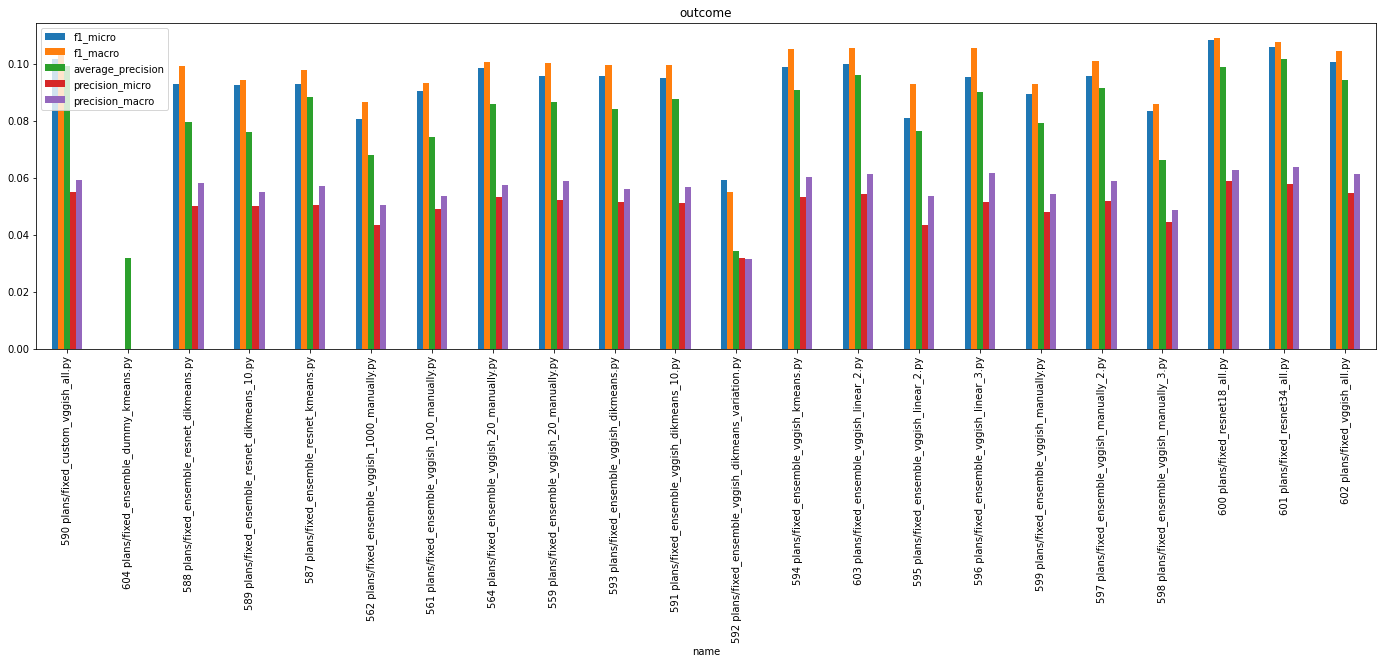

\begin{tabular}{lrrrr}
\toprule
                              name &  roc\_auc &  average\_precision &  f1\_micro &  f1\_macro \\
\midrule
                 custom\_vggish\_all &    0.687 &              0.099 &     0.102 &     0.104 \\
             ensemble\_dummy\_kmeans &    0.500 &              0.032 &     0.000 &     0.000 \\
          ensemble\_resnet\_dikmeans &    0.679 &              0.080 &     0.093 &     0.099 \\
       ensemble\_resnet\_dikmeans\_10 &    0.655 &              0.076 &     0.092 &     0.094 \\
            ensemble\_resnet\_kmeans &    0.675 &              0.088 &     0.093 &     0.098 \\
     ensemble\_vggish\_1000\_manually &    0.624 &              0.068 &     0.080 &     0.087 \\
      ensemble\_vggish\_100\_manually &    0.639 &              0.074 &     0.090 &     0.093 \\
       ensemble\_vggish\_20\_manually &    0.677 &              0.086 &     0.098 &     0.101 \\
       ensemble\_vggish\_20\_manually &    0.661 &              0.087 &     0.096 &     0

In [2]:
# metric = 'f1_macro'

# results['final_outcome'] = results['outcome'].apply(extract_final_outcome)
# results['best_outcome'] = results['outcome'].apply(lambda v: extract_best_outcome(v, metric=metric))
# results['best_epoch'] = results['outcome'].apply(lambda v: extract_best_epoch(v, metric=metric))

def display_outcome(col):
    outcome = []
    for _, row in results.iterrows():
        out = copy.deepcopy(row[col])
        del out['confusion_matrix']
        del out['average_precision_all']
        del out['roc_auc_all']
        out['id'] = row['id']
        outcome.append(out)

    outcome = pd.DataFrame(outcome).merge(results[['id', 'sourcefile']], on=['id'])
    outcome['name'] = outcome['id'].apply(str) + ' ' + outcome['sourcefile']
    outcome[[
        'name',
#         'roc_auc',
        'f1_micro',
        'f1_macro',
        'average_precision',
        'precision_micro',
        'precision_macro',
    ]].plot.bar(x='name', title=col, figsize=(24,6))
    plt.show()

results = results.sort_values(by=['sourcefile'])
# display(results[['id', 'sourcefile', 'best_epoch']])

display_outcome('outcome')
best_outcome = pd.json_normalize(results['outcome'])
best_outcome['name'] = pd.DataFrame(results['id'].apply(str) + ' ' + results['sourcefile']).reset_index()[0]

paper_results = best_outcome[['name', 'roc_auc', 'average_precision', 'f1_micro', 'f1_macro']].round(3)
paper_results['name'] = paper_results['name'].apply(lambda v: v[4:].replace('plans/fixed_', '').replace('sampled_', '').replace('.py', '').replace('ensemble_c', 'ec'))
print(paper_results.to_latex(index=False))

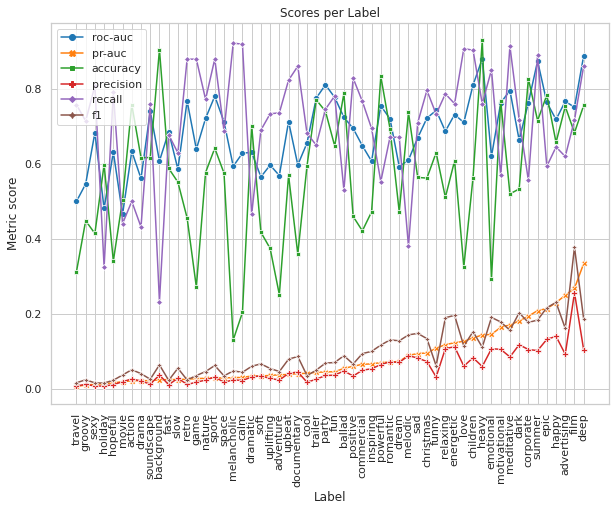

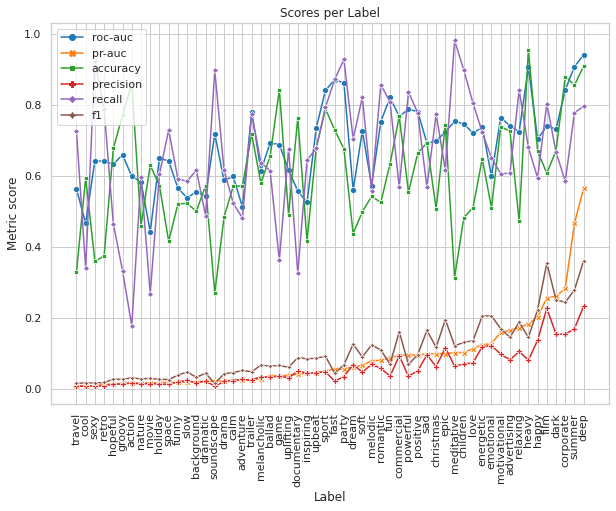

/home/mikevo/docs/dbis/music/mediaeval2021/src/mediaeval2021/analytics.py:113: RuntimeWarning: invalid value encountered in long_scalars
  precision_all.append(tp / (tp + fp))


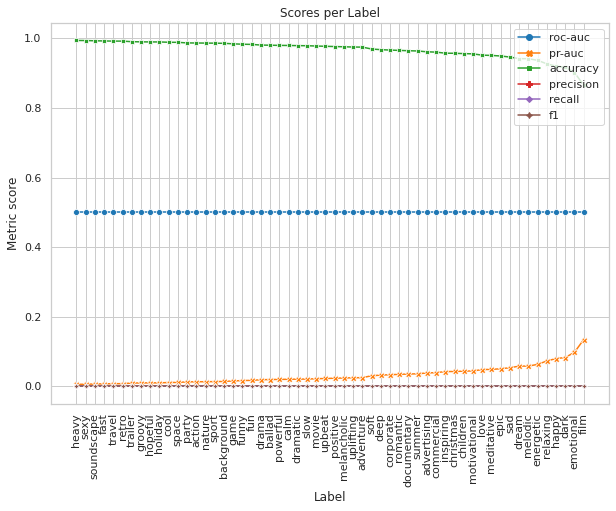

roc-auc      0.500000
pr-auc       0.031924
accuracy     0.968076
precision         NaN
recall       0.000000
f1           0.000000
dtype: float64

(Index(['heavy', 'sexy', 'soundscape', 'fast', 'travel', 'retro', 'trailer',
       'groovy', 'hopeful', 'holiday', 'cool', 'space', 'party', 'action',
       'nature', 'sport', 'background', 'game', 'funny', 'fun', 'drama',
       'ballad', 'powerful', 'calm', 'dramatic', 'slow', 'movie', 'upbeat'],
      dtype='object'), Index(['positive', 'melancholic', 'uplifting', 'adventure', 'soft', 'deep',
       'corporate', 'romantic', 'documentary', 'summer', 'advertising',
       'commercial', 'inspiring', 'christmas', 'children', 'motivational',
       'love', 'meditative', 'epic', 'sad', 'dream', 'melodic', 'energetic',
       'relaxing', 'happy', 'dark', 'emotional', 'film'],
      dtype='object'))


In [6]:
metric = 'pr-auc'

data593 = data = extract_metrics(results[results['id'] == 593].iloc[0]).sort_values(by=[metric])
print_per_label(data)
plt.show()

data594 = data = extract_metrics(results[results['id'] == 594].iloc[0]).sort_values(by=[metric])
print_per_label(data)
plt.show()

data602 = data = extract_metrics(results[results['id'] == 604].iloc[0]).sort_values(by=[metric])
print_per_label(data)
plt.show()

display(data.mean())

la = data.sort_values(by=[metric]).index[:28], data.sort_values(by=[metric]).index[28:]
print(la)

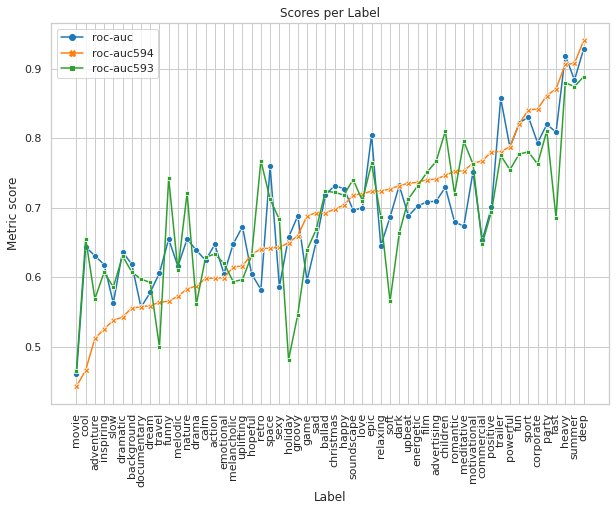

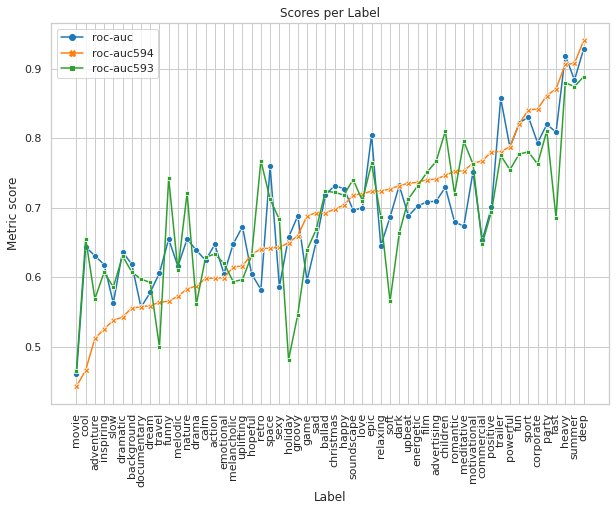

In [4]:
data602['roc-auc593'] = data593['roc-auc']
data602['roc-auc594'] = data594['roc-auc']

print_per_label(data602[['roc-auc', 'roc-auc594', 'roc-auc593']].sort_values(by=['roc-auc594']))

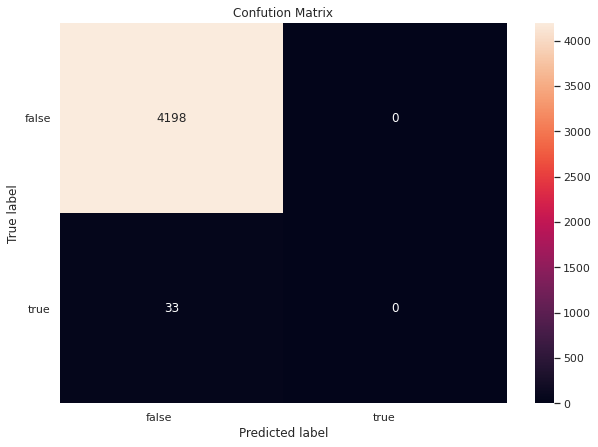

In [8]:
from mediaeval2021.analytics import plot_confusion_matrix

plot_confusion_matrix(results[results['id'] == 604].iloc[0], multilabel='travel')